In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

import pandas as pd
import numpy as np
import ipywidgets as widgets
from ipywidgets.widgets.interaction import show_inline_matplotlib_plots

import glob
import pathlib

# Import Danych

In [2]:
from pathlib import Path, PurePath
from speed_analyse_scripts.utils import get_latest_file_from_directory

file_extension = "avi"
# file_extension = "csv"
dir_paths = [
    "resources/speeds/same_wagony/",
    "resources/speeds/full_train/",
    "resources/speeds/full_train_speed_up/",
]

files_paths = [get_latest_file_from_directory(dir_path, file_extension) for dir_path in dir_paths]
files_paths = [PurePath(file_path) for file_path in files_paths]

files = {}
for file_path in files_paths:
    parent_dir_name = file_path.parent.name
    files[parent_dir_name] = str(file_path)
    # files[parent_dir_name] = pd.read_csv(file_path)

files

{'same_wagony': 'resources\\speeds\\same_wagony\\same_wagony.avi',
 'full_train': 'resources\\speeds\\full_train\\full_train.avi',
 'full_train_speed_up': 'resources\\speeds\\full_train_speed_up\\full_train_speed_up.avi'}

In [3]:

import copy
from speed_analyse_scripts.utils import Measurement
from stitch.speed.VelocityEstimator import VelocityEstimator
from stitch.speed.regression.LstsqMethod import LstsqMethod
from stitch.speed.regression.OlsMethod import OlsMethod
from stitch.speed.regression.WlsMethod import WlsMethod

velocity_estimators = {
    "lstsq": VelocityEstimator(LstsqMethod(), LstsqMethod()),
    "OLS": VelocityEstimator(OlsMethod(), OlsMethod()),
    "WLS": VelocityEstimator(WlsMethod(), WlsMethod()),
}

raw_velocities = {key: [] for key, value in files.items()}

measurements = []
for file_name in files.keys(): 
    for method_name, estimator in velocity_estimators.items():
        velocity_estimator = copy.deepcopy(estimator)

        measurement = Measurement(file_name, method_name, velocity_estimator, [])
        measurements.append(measurement)

print(raw_velocities)
measurements


{'same_wagony': [], 'full_train': [], 'full_train_speed_up': []}


[Measurement(dataset_name='same_wagony', method_name='lstsq', velocity_estimator=<stitch.speed.VelocityEstimator.VelocityEstimator object at 0x0000026C97462340>, results=[]),
 Measurement(dataset_name='same_wagony', method_name='OLS', velocity_estimator=<stitch.speed.VelocityEstimator.VelocityEstimator object at 0x0000026C97462670>, results=[]),
 Measurement(dataset_name='same_wagony', method_name='WLS', velocity_estimator=<stitch.speed.VelocityEstimator.VelocityEstimator object at 0x0000026C97462850>, results=[]),
 Measurement(dataset_name='full_train', method_name='lstsq', velocity_estimator=<stitch.speed.VelocityEstimator.VelocityEstimator object at 0x0000026C97462BE0>, results=[]),
 Measurement(dataset_name='full_train', method_name='OLS', velocity_estimator=<stitch.speed.VelocityEstimator.VelocityEstimator object at 0x0000026C97462FD0>, results=[]),
 Measurement(dataset_name='full_train', method_name='WLS', velocity_estimator=<stitch.speed.VelocityEstimator.VelocityEstimator objec

In [4]:
import cv2
from tqdm import tqdm

def measure_velocity_from_movie(dataset_name, movie_path, *measurements):
    input_cam = cv2.VideoCapture(movie_path)
    total_frames = input_cam.get(cv2.CAP_PROP_FRAME_COUNT)

    counter = 0
    with tqdm(total=total_frames, desc=dataset_name) as pbar:
        while input_cam.isOpened():
            ret, frame = input_cam.read()

            if ret:
                append_raw_velocity = True
                
                for measurement in measurements:
                    velocity = measurement.velocity_estimator.get_velocity(frame)
                    
                    result = (counter, velocity[0], velocity[1])
                    measurement.results.append(result)

                    if append_raw_velocity:
                        raw_velocity = measurement.velocity_estimator.old_raw_velocity
                        raw_velocities[dataset_name].append(raw_velocity)
                        append_raw_velocity = False
            else:
                break

            counter += 1
            pbar.update(1)

    input_cam.release()

In [5]:
# for dataset_name, movie_path in files.items():
#     measure_on_dataset(dataset_name, movie_path)

# dataset_name, movie_path = list(files.items())[0]
# measure_on_dataset(dataset_name, movie_path, *measurements)

for dataset_name, file_path in files.items():
    selected_measurements = filter(lambda x: x.dataset_name == dataset_name, measurements)
    selected_measurements = list(selected_measurements)

    measure_velocity_from_movie(dataset_name, file_path, *selected_measurements)    
    

same_wagony:   0%|          | 0/308.0 [00:00<?, ?it/s]


AttributeError: 'list' object has no attribute 'velocity_estimator'

In [ ]:
dataset_name, movie_path = list(files.items())[0]
selected_measurements = filter(lambda x: x.dataset_name == dataset_name, measurements)
selected_measurements = list(selected_measurements)
selected_measurements

[Measurement(dataset_name='same_wagony', method_name='lstsq', velocity_estimator=<stitch.speed.VelocityEstimator.VelocityEstimator object at 0x00000114162511C0>, results=[(0, 0, 0), (1, -8.748497461017811, -0.2986819744110108), (2, -9.546784353226773, -0.28411615977249005), (3, -9.296315149682183, -0.30260792132274056), (4, -9.48185100058194, -0.3252200717230909), (5, -9.302981713112537, -0.30420670625566976), (6, -9.158755382898338, -0.29142728504868576), (7, -9.000799866200143, -0.2644192757435641), (8, -8.933997295167913, -0.2556500559664312), (9, -8.820331645640563, -0.23573884146364757), (10, -8.880825491421712, -0.24624927835412494), (11, -8.796694540184896, -0.22921383230956247), (12, -8.821539248934203, -0.22464881017510985), (13, -8.74642549125144, -0.203852260239871), (14, -8.702321113707569, -0.20230657337661218), (15, -8.60474238563331, -0.18598543946887455), (16, -8.590812879883106, -0.1837624636546029), (17, -8.492174827436285, -0.16526447638612682), (18, -8.5405640121788

In [ ]:
from functools import reduce
from speed_analyse_scripts.utils import filter_error

headers = ["frame", "x", "y"]

for key, value in raw_velocities.items():
    if len(value) != 0:
        concatenated_array = reduce(lambda a, b: np.append(a, b, axis=0), value)

        df = pd.DataFrame(concatenated_array)
        df.columns = headers
        raw_velocities[key] = filter_error(df).to_numpy()
        

raw_velocities

{'same_wagony': array([[ 1.00000000e+00, -1.30733032e+01, -5.12786865e-01],
        [ 1.00000000e+00, -1.29685059e+01, -3.82171631e-01],
        [ 1.00000000e+00, -1.41759033e+01, -5.03173828e-01],
        ...,
        [ 3.07000000e+02, -1.13950806e+01,  1.51565552e-01],
        [ 3.07000000e+02, -1.05408096e+01,  3.41247559e-01],
        [ 3.07000000e+02, -1.20139160e+01, -2.24487305e-01]]),
 'full_train': [],
 'full_train_speed_up': []}

In [ ]:
raw_velocities

{'same_wagony': array([[ 1.00000000e+00, -1.30733032e+01, -5.12786865e-01],
        [ 1.00000000e+00, -1.29685059e+01, -3.82171631e-01],
        [ 1.00000000e+00, -1.41759033e+01, -5.03173828e-01],
        ...,
        [ 3.07000000e+02, -1.13950806e+01,  1.51565552e-01],
        [ 3.07000000e+02, -1.05408096e+01,  3.41247559e-01],
        [ 3.07000000e+02, -1.20139160e+01, -2.24487305e-01]]),
 'full_train': [],
 'full_train_speed_up': []}

# Porównanie metod regresji

c:\Users\wrzezniczak\Desktop\onyks_owl\poc\speed_analyse_scripts\ComposedPlot.py:33: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  self.fig.show()


TypeError: list indices must be integers or slices, not tuple

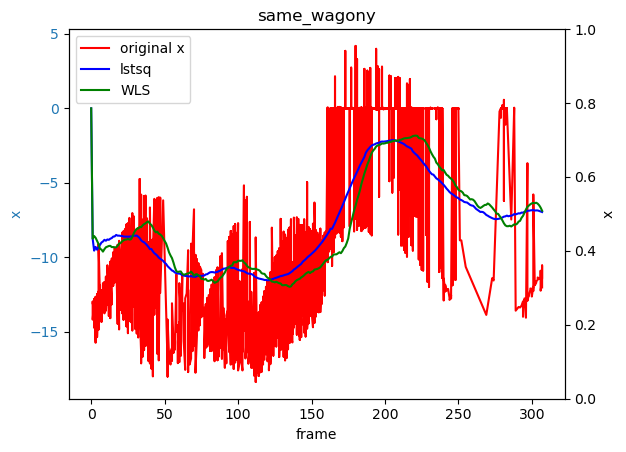

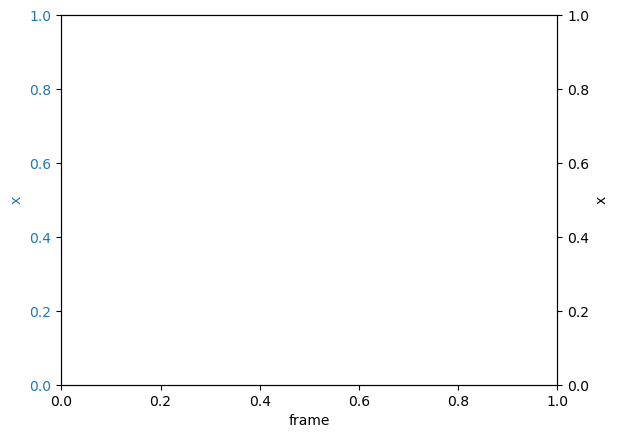

In [ ]:
from speed_analyse_scripts.ComposedPlot import ComposedPlot


def ax1_call(axe):
    color = "tab:blue"
    axe.set_xlabel("frame")
    axe.set_ylabel("x", color=color)
    axe.tick_params(axis='y', labelcolor=color)

def ax2_call(axe):
    axe.set_ylabel("x")

for dataset_name in files.keys():
    ax_callbacks = [ax1_call, ax2_call]
    Composed_x = ComposedPlot(dataset_name, *ax_callbacks)	

    colors = ["blue", "green", "orange"]

    original = raw_velocities[dataset_name] 
    x = original[:, 0]
    y = original[:, 1]
    Composed_x.add_plot(0, x, y, color="red", label="original x")
    
    selected_measurements = filter(lambda x: x.dataset_name == dataset_name, measurements)
    selected_measurements = list(selected_measurements)
    for measurement, color in zip(selected_measurements, colors):
        array = np.array(measurement.results)
        x = array[:, 0]
        y = array[:, 1]
        Composed_x.add_plot(0, x, y, color=color, label=measurement.method_name)
    Composed_x.show_composed()

In [ ]:
# from speed_analyse_scripts.ComposedPlot import ComposedPlot
# from speed_analyse_scripts.RegressionMethod import RegressionMethodView
# from speed_analyse_scripts.regression_methods import IRLS_method, OLS_method, WLS_method, lstsq_method
# from speed_analyse_scripts.utils import count_iterations, df_frame_int_range_slider, iterate_over_df_with_window


# methods = [
#     RegressionMethodView("lstsq", lstsq_method),
#     RegressionMethodView("OLS", OLS_method),
#     RegressionMethodView("WLS", WLS_method),
#     # RegressionMethodView("IRLS", IRLS_method),
# 	# RegressionMethodView("WLS_least_squares", WLS_least_squares),
# ]

# int_range_slider = df_frame_int_range_slider(df_velocity)
# button = widgets.Button(description = "run")
# window_size_bounded_text= widgets.BoundedIntText(description="window size:", value=25, max=1000)
# window_step_bounded_text= widgets.BoundedIntText(description="window step:", value=5, max=1000)
# out = widgets.Output()

# def ax1_call(axe):
#     color = "tab:blue"
#     axe.set_xlabel("frame")
#     axe.set_ylabel("x", color=color)
#     axe.tick_params(axis='y', labelcolor=color)

# def ax2_call(axe):
#     axe.set_ylabel("x")

# ax_callbacks = [ax1_call, ax2_call]

# # Composed_x = ComposedPlot("x-frame", *ax_callbacks)
# # Composed_y = ComposedPlot("y-frame", *ax_callbacks)


# def button_on_click(button):

# 	out.clear_output()
# 	kwargs = {
# 		"df_frame_range": int_range_slider.value,
# 		"window_size": window_size_bounded_text.value,
# 		"window_step": window_step_bounded_text.value,
# 	}
# 	iterations = count_iterations(*list(kwargs.values()))
	
# 	for method in methods:
# 		method.progress_bar.max = iterations
# 		with out:
# 			display(method.progress_bar)

# 	for method in methods:
# 		iterate_over_df_with_window(df_velocity, method.run(), **kwargs)
# 		method.df = pd.DataFrame(method.output, columns=["frame", "x", "y"])
# 		method.output = []

# 	left_frame, right_frame = int_range_slider.value
# 	condition = (df_velocity["frame"] >= left_frame) & (df_velocity["frame"] <= right_frame)

# 	# x plots
# 	with out:
# 		df_velocity_filtered = filter_error(df_velocity.loc[condition])
# 		x_f = df_velocity_filtered["frame"]
# 		y_f = df_velocity_filtered["x"]

# 		df_velocity_original = df_velocity.loc[condition]
# 		x = df_velocity_original["frame"]
# 		y = df_velocity_original["x"]

# 		Composed_x = ComposedPlot("x-frame", *ax_callbacks)	
# 		Composed_x.add_plot(0, x, y, color="blue", label="original x")
# 		# Composed_x.add_plot(0, x_f, y_f, color="orange", label="filtered x")

# 		colors = ["red", "green", "purple"]
# 		for method, color in zip(methods, colors):
# 			x = method.df["frame"]
# 			y = method.df["x"]
# 			Composed_x.add_plot(1, x, y, color=color, label=method.name)
		
# 		Composed_x.show_composed()
# 		# print(df_velocity.loc[condition].plot.scatter(x="frame", y="x", title=f"original x-frame"))
# 		show_inline_matplotlib_plots()


# 	for method in methods:
# 		with out:
# 			print(method.df.plot(x="frame", y="x", title=f"{method.name} x-frame"))
# 			show_inline_matplotlib_plots()
	
# 	# y plots
# 	with out:
# 			print(df_velocity.loc[condition].plot.scatter(x="frame", y="y", title=f"original y-frame"))

# 	for method in methods:
# 		with out:
# 			print(method.df.plot(x="frame", y="y", title=f"{method.name} y-frame"))
# 			show_inline_matplotlib_plots()

# 		method.reset_progress_bar()

# 	# with out:
# 	# 	method_df = methods[0].df

# 	# 	fig, ax1 = plt.subplots()
# 	# 	ax1.plot(df_velocity["frame"], df_velocity["x"])

# 	# 	ax2 = ax1.twinx()
# 	# 	ax2.plot(method_df["frame"], method_df["x"], color="orange")
# 	# 	show_inline_matplotlib_plots()
	

# button.on_click(button_on_click)
# display(int_range_slider, window_size_bounded_text, window_step_bounded_text)
# display(button, out)


# Porównanie wyników regresji całego filmu i praktycznego jej zastosowania

In [ ]:
# from speed_analyse_scripts.regression_methods import lstsq_method

# # all_movie_path = "resources/speeds/same_wagony/1.csv"
# # out_path = "resources/speeds/same_wagony/out_1.csv"

# all_movie_path = "resources/speeds/full_train/1.csv"
# out_path = "resources/speeds/full_train/out.csv"


# df_all_movie = pd.read_csv(all_movie_path)
# df_out =  pd.read_csv(out_path)

# method = RegressionMethodView("lstsq", lstsq_method)

# button = widgets.Button(description = "run")
# window_size_bounded_text= widgets.BoundedIntText(description="window size:", value=25, max=1000)
# window_step_bounded_text= widgets.BoundedIntText(description="window step:", value=1, max=1000)
# out_1 = widgets.Output()

# def ax1_call(axe):
#     color = "tab:blue"
#     axe.set_xlabel("frame")
#     axe.set_ylabel("x", color=color)
#     axe.tick_params(axis='y', labelcolor=color)

# def ax2_call(axe):
#     axe.set_ylabel("x")

# ax_callbacks = [ax1_call, ax2_call]

# def button_on_click(button):

#     out_1.clear_output()

#     min_frame = df_all_movie["frame"].min()
#     max_frame = df_all_movie["frame"].max()
#     kwargs = {
#         "df_frame_range": (min_frame, max_frame),
#         "window_size": window_size_bounded_text.value,
#         "window_step": window_step_bounded_text.value,
#     }
#     print(kwargs)
#     iterations = count_iterations(*list(kwargs.values()))
#     method.progress_bar.max = iterations
        
#     with out_1:
#         display(method.progress_bar)

#     iterate_over_df_with_window(df_all_movie, method.run(), **kwargs)
#     method.df = pd.DataFrame(method.output, columns=["frame", "x", "y"])
#     df_filtered = filter_error(df_all_movie)

#     # x plots
#     Composed_x = ComposedPlot("x-frame", *ax_callbacks)
#     # Composed_x.add_plot(0, df_all_movie["frame"], df_all_movie["x"], color="tab:blue", label="original")
#     Composed_x.add_plot(0, df_filtered["frame"], df_filtered["x"], color="blue", label="original")
#     Composed_x.add_plot(1, method.df["frame"], method.df["x"], color="red", label="estimated")
#     Composed_x.add_plot(1, df_out["frame"], df_out["x"], color="green", label="output")

#     with out_1:
#         Composed_x.show_composed()
#         show_inline_matplotlib_plots()
	
#     print(method.df)
# 	# # y plots
# 	# Composed_y = ComposedPlot("y-frame", *ax_callbacks)

# 	# with out:
# 	# 	print(df_velocity.loc[condition].plot.scatter(x="frame", y="y", title=f"original y-frame"))
# 	# 	print(method.df.plot(x="frame", y="y", title=f"{method.name} y-frame"))
# 	# 	show_inline_matplotlib_plots()

#     method.reset_progress_bar()


# button.on_click(button_on_click)
# display(window_size_bounded_text, window_step_bounded_text)
# display(button, out_1)

# # kwargs = {
# #         "df_frame_range": (0, 3839),
# #         "window_size": 25,
# #         "window_step": 1,
# #     }
# # iterate_over_df_with_window(df_all_movie, method.run(), **kwargs)
# # method.df = pd.DataFrame(method.output, columns=["frame", "x", "y"])
# # method.df

In [ ]:

# from speed_analyse_scripts import regression_methods
# from speed_analyse_scripts.RegressionMethod import RegressionMethodView

# RegressionMethodView("a", "b")


In [ ]:
# import matplotlib.pyplot as plt
# import matplotlib.colors as mcolors

# method_df = methods[0].df
# method_df_1 = methods[1].df


# fig, ax1 = plt.subplots()
# color = "tab:blue"
# ax1.set_xlabel("frame")
# ax1.set_ylabel("x", color=color)
# ax1.tick_params(axis='y', labelcolor=color)
# plot_0 = ax1.plot(df_velocity["frame"], df_velocity["x"], color=color, label="plot 3")
# plot_0 = ax1.plot(method_df_1["frame"], method_df_1["y"], color="purple", label="plot 3")

# ax2 = ax1.twinx()
# ax2.set_ylabel("x")
# plot_1 = ax2.plot(method_df["frame"], method_df["x"], color=(1, 0 , 0, 0.5), label="plot 1")
# plot_2 = ax2.plot(method_df_1["frame"], method_df_1["x"], color=(0, 1 , 0, 0.5), label="plot 2")
# plots = (plot_0, plot_1, plot_2)


# lines = [plot[0] for plot in plots]
# lines_labels = [line.get_label() for line in lines]
# ax1.legend(lines, lines_labels)
# ax1.set_title("title")

